In [1]:
import numpy as np
import cv2

# 视频分辨率
width, height = 1920, 1080

# RGB 值
R, G, B = 126, 127, 128

# 创建 RGB 图像
rgb_image = np.zeros((height, width, 3), dtype=np.uint8)
rgb_image[:, :, 0] = B  # Blue channel
rgb_image[:, :, 1] = G  # Green channel
rgb_image[:, :, 2] = R  # Red channel

# 保存 RGB 图像
rgb_output_path = './grey_rgb.png'
cv2.imwrite(rgb_output_path, rgb_image)
print(f"RGB 图像已保存到: {rgb_output_path}")

# 将 RGB 图像转换为 YUV
yuv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2YUV)

# 分离 Y, U, V 平面
Y_plane = yuv_image[:, :, 0]
U_plane = cv2.resize(yuv_image[:, :, 1], (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)  # 4:2:0 子采样
V_plane = cv2.resize(yuv_image[:, :, 2], (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)

# 合并 Y, U, V 平面为 YUV 数据
yuv_data = np.concatenate([Y_plane.flatten(), U_plane.flatten(), V_plane.flatten()])

# 保存为 .yuv 文件
yuv_output_path = './grey.yuv'
with open(yuv_output_path, 'wb') as f:
    f.write(yuv_data)

print(f"YUV 视频已保存到: {yuv_output_path}")


RGB 图像已保存到: ./grey_rgb.png
YUV 视频已保存到: ./grey.yuv


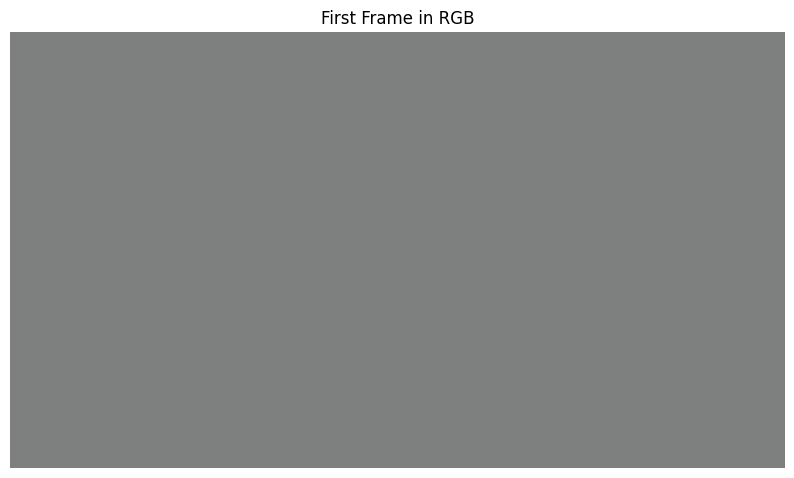

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 视频参数
width = 1920  # 视频宽度
height = 1080  # 视频高度
yuv_file = 'grey.yuv'  # YUV 文件路径

# 读取 YUV 文件
with open(yuv_file, 'rb') as f:
    yuv_data = f.read()

# 计算 YUV 4:2:0 格式的平面大小
frame_size = width * height * 3 // 2  # 4:2:0 格式每帧占用的字节数
assert len(yuv_data) >= frame_size, "YUV 文件数据不足，无法读取第一帧。"

# 分离 YUV 平面
Y_plane = np.frombuffer(yuv_data[0:width * height], dtype=np.uint8).reshape((height, width))
U_plane = np.frombuffer(yuv_data[width * height:width * height + (width // 2) * (height // 2)], dtype=np.uint8).reshape((height // 2, width // 2))
V_plane = np.frombuffer(yuv_data[width * height + (width // 2) * (height // 2):frame_size], dtype=np.uint8).reshape((height // 2, width // 2))

# 恢复 U 和 V 到与 Y 相同的尺寸
U_plane_full = cv2.resize(U_plane, (width, height), interpolation=cv2.INTER_LINEAR)
V_plane_full = cv2.resize(V_plane, (width, height), interpolation=cv2.INTER_LINEAR)

# 合并 YUV 平面到 BGR 格式
yuv_frame = np.stack([Y_plane, U_plane_full, V_plane_full], axis=-1).astype(np.uint8)
rgb_frame = cv2.cvtColor(yuv_frame, cv2.COLOR_YUV2RGB)

# 使用 Matplotlib 显示
plt.figure(figsize=(10, 6))
plt.imshow(rgb_frame)
plt.title("First Frame in RGB")
plt.axis("off")
plt.show()


In [3]:
import numpy as np
import cv2

# 视频分辨率
width, height = 1920, 1080

# 网格尺寸
grid_size = 80  # 每个网格的边长（像素）

# 创建黑白网格图像
bw_image = np.zeros((height, width), dtype=np.uint8)
for i in range(0, height, grid_size):
    for j in range(0, width, grid_size):
        if (i // grid_size + j // grid_size) % 2 == 0:
            bw_image[i:i+grid_size, j:j+grid_size] = 255  # 白色网格

# 将黑白图像转为 RGB 格式
rgb_image = cv2.cvtColor(bw_image, cv2.COLOR_GRAY2BGR)

# 保存黑白网格图像
rgb_output_path = './grid_rgb.png'
cv2.imwrite(rgb_output_path, rgb_image)
print(f"黑白网格图像已保存到: {rgb_output_path}")

# 将 RGB 图像转换为 YUV
yuv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2YUV)

# 分离 Y, U, V 平面
Y_plane = yuv_image[:, :, 0]
U_plane = cv2.resize(yuv_image[:, :, 1], (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)  # 4:2:0 子采样
V_plane = cv2.resize(yuv_image[:, :, 2], (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)

# 合并 Y, U, V 平面为 YUV 数据
yuv_data = np.concatenate([Y_plane.flatten(), U_plane.flatten(), V_plane.flatten()])

# 保存为 .yuv 文件
yuv_output_path = './grid.yuv'
with open(yuv_output_path, 'wb') as f:
    f.write(yuv_data)

print(f"YUV 视频已保存到: {yuv_output_path}")


黑白网格图像已保存到: ./grid_rgb.png
YUV 视频已保存到: ./grid.yuv


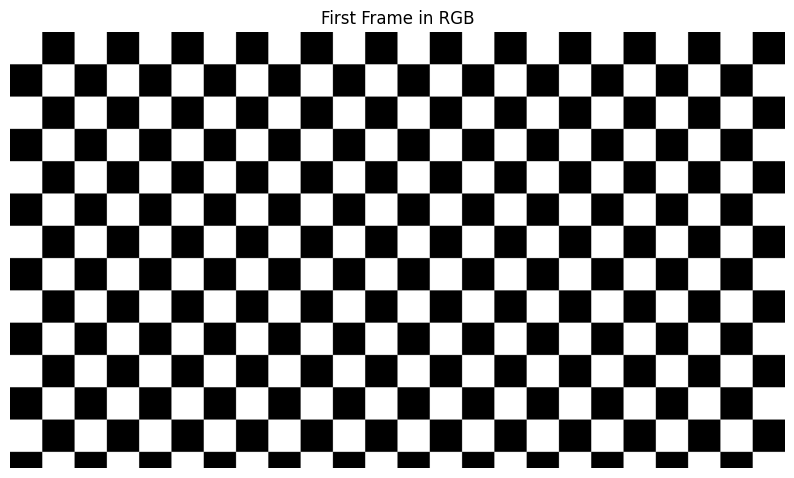

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 视频参数
width = 1920  # 视频宽度
height = 1080  # 视频高度
yuv_file = 'grid.yuv'  # YUV 文件路径

# 读取 YUV 文件
with open(yuv_file, 'rb') as f:
    yuv_data = f.read()

# 计算 YUV 4:2:0 格式的平面大小
frame_size = width * height * 3 // 2  # 4:2:0 格式每帧占用的字节数
assert len(yuv_data) >= frame_size, "YUV 文件数据不足，无法读取第一帧。"

# 分离 YUV 平面
Y_plane = np.frombuffer(yuv_data[0:width * height], dtype=np.uint8).reshape((height, width))
U_plane = np.frombuffer(yuv_data[width * height:width * height + (width // 2) * (height // 2)], dtype=np.uint8).reshape((height // 2, width // 2))
V_plane = np.frombuffer(yuv_data[width * height + (width // 2) * (height // 2):frame_size], dtype=np.uint8).reshape((height // 2, width // 2))

# 恢复 U 和 V 到与 Y 相同的尺寸
U_plane_full = cv2.resize(U_plane, (width, height), interpolation=cv2.INTER_LINEAR)
V_plane_full = cv2.resize(V_plane, (width, height), interpolation=cv2.INTER_LINEAR)

# 合并 YUV 平面到 BGR 格式
yuv_frame = np.stack([Y_plane, U_plane_full, V_plane_full], axis=-1).astype(np.uint8)
rgb_frame = cv2.cvtColor(yuv_frame, cv2.COLOR_YUV2RGB)

# 使用 Matplotlib 显示
plt.figure(figsize=(10, 6))
plt.imshow(rgb_frame)
plt.title("First Frame in RGB")
plt.axis("off")
plt.show()
